# JUEGOS OLIMPICOS


In [11]:
# LIBRERIAS
import pandas as pd
import numpy as np

In [12]:
data=pd.read_csv("athlete_events.csv")
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


### **Análisis Exploratorio de Datos**
1. Cargar los datos
2. Revisión Inicial
3. Resumen Estadístico
4. Visualización Inicial
5. Manejo de los valores faltantes
6. Análisis de Distribución
7. Identifación de valores atípicos
8. Análisis de relaciones
9. Segmentación y Agrupación
10. Iteración y Descrubrimiento
11. Documentación y Comunicación

**Descripcion del conjunto**

In [100]:
data.shape

(271116, 15)

**Preguntas**
1. ¿Cuántas medallas se han dado en cada categoría?
2. ¿Qué deportes son los más populares?
3. ¿Cuántos hombres y mujeres han participado en los juegos olímpicos?

In [101]:
data.info()
#verificar datos nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     271116 non-null  float64
 4   Height  271116 non-null  float64
 5   Weight  271116 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   271116 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [102]:
data.describe()
#descripcion de data

,ID,Age,Height,Weight,Year
count,271116.000000,271116.000000,271116.00000,271116.000000,271116.000000
mean,68248.954396,25.556898,175.33897,70.702393,1978.378480
std,39022.286345,6.280857,9.27810,12.574690,29.877632
min,1.000000,10.000000,127.00000,25.000000,1896.000000
25%,34643.000000,22.000000,170.00000,63.000000,1960.000000
50%,68205.000000,25.000000,175.33897,70.702393,1988.000000
75%,102097.250000,28.000000,180.00000,75.000000,2002.000000
max,135571.000000,97.000000,226.00000,214.000000,2016.000000


**Manejo de datos faltantes**

In [103]:
# los valores numericos completarlos con el promedio de dichar columna
numeric_columns=data.select_dtypes(include=['number'])
for column in numeric_columns.columns:
    data[column]=data[column].fillna(data[column].mean())

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     271116 non-null  float64
 4   Height  271116 non-null  float64
 5   Weight  271116 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   271116 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [105]:
# NA A LOS VALORES VACIOS SIN MEDALLA
data['Medal']=data['Medal'].fillna('Sin medalla')

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     271116 non-null  float64
 4   Height  271116 non-null  float64
 5   Weight  271116 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   271116 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [107]:
data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,271116.000000,271116.00000,271116.000000,271116.000000
mean,68248.954396,25.556898,175.33897,70.702393,1978.378480
std,39022.286345,6.280857,9.27810,12.574690,29.877632
min,1.000000,10.000000,127.00000,25.000000,1896.000000
25%,34643.000000,22.000000,170.00000,63.000000,1960.000000
50%,68205.000000,25.000000,175.33897,70.702393,1988.000000
75%,102097.250000,28.000000,180.00000,75.000000,2002.000000
max,135571.000000,97.000000,226.00000,214.000000,2016.000000


**Analisis del conjunto**

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Age', ylabel='Count'>

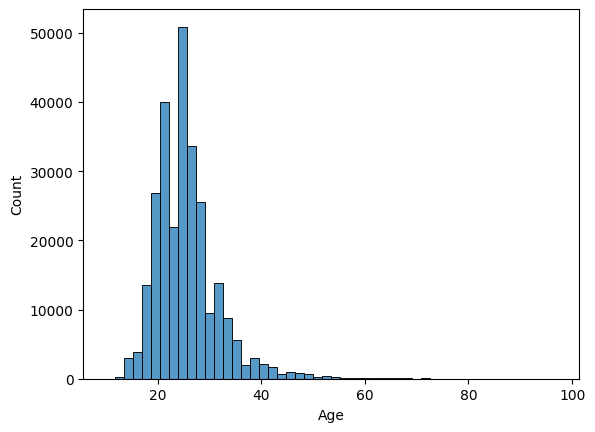

In [109]:
sns.histplot(data=data,x="Age",bins=50)

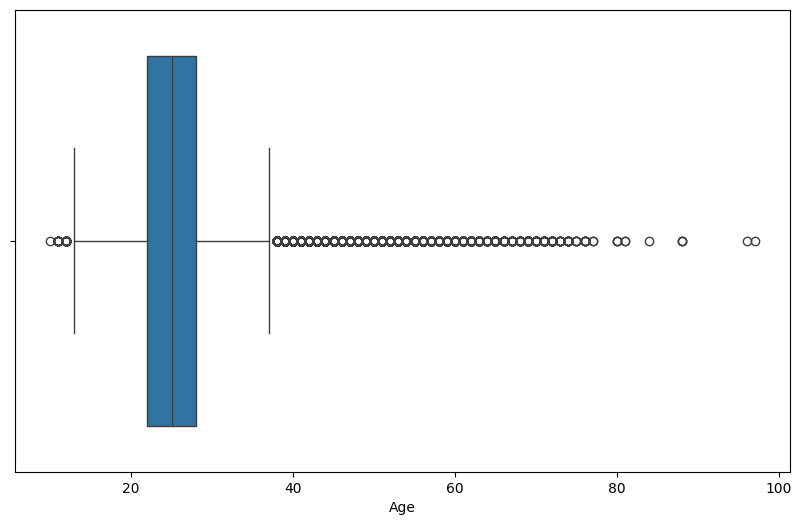

In [110]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data["Age"])
plt.show()
#identificar valorex min-max atipicos

In [111]:
from scipy import stats

In [112]:
#rango intercuatilico
stats.iqr(data["Age"])

np.float64(6.0)

In [113]:
a=28 +(1.5*6)
b=22-(1.5*6)
[a,b]


[37.0, 13.0]

In [114]:
atletas_mayores=data[data["Age"]>37]
atletas_mayores.shape

(11928, 15)

In [115]:
atletas_menores=data[data["Age"]<13]
atletas_menores.shape

(53, 15)

In [116]:
atletas_mayores["Sport"].value_counts().head()

Sport
Shooting            3178
Art Competitions    2226
Equestrianism       1997
Sailing             1040
Fencing             1031
Name: count, dtype: int64

In [117]:
atletas_menores["Sport"].value_counts().head()

Sport
Swimming          25
Figure Skating    15
Rowing             5
Gymnastics         5
Athletics          2
Name: count, dtype: int64

**Información en las distintas categorías**

In [118]:
#obtener informacion de columnas de tipo texto
text_columns=data.select_dtypes(include=['object'])

In [119]:
text_columns.columns

Index(['Name', 'Sex', 'Team', 'NOC', 'Games', 'Season', 'City', 'Sport',
       'Event', 'Medal'],
      dtype='object')

In [120]:
for column in text_columns.columns:
    if column!='Name':
        print(data[column].value_counts().head())
        print()

Sex
M    196594
F     74522
Name: count, dtype: int64

Team
United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Name: count, dtype: int64

NOC
USA    18853
FRA    12758
GBR    12256
ITA    10715
GER     9830
Name: count, dtype: int64

Games
2000 Summer    13821
1996 Summer    13780
2016 Summer    13688
2008 Summer    13602
2004 Summer    13443
Name: count, dtype: int64

Season
Summer    222552
Winter     48564
Name: count, dtype: int64

City
London            22426
Athina            15556
Sydney            13821
Atlanta           13780
Rio de Janeiro    13688
Name: count, dtype: int64

Sport
Athletics     38624
Gymnastics    26707
Swimming      23195
Shooting      11448
Cycling       10859
Name: count, dtype: int64

Event
Football Men's Football        5733
Ice Hockey Men's Ice Hockey    4762
Hockey Men's Hockey            3958
Water Polo Men's Water Polo    3358
Basketball Men's Basketball    3280
Name: count, dtype: int64

In [121]:
#Agrupar datos
data.groupby("Year")[["Age","Height","Weight"]].agg(["min","max","mean"]).tail()

Age                  Height                    Weight                  
       min   max       mean    min    max        mean    min    max       mean
Year                                                                          
2008  12.0  67.0  25.734092  137.0  226.0  176.201381   28.0  214.0  71.389552
2010  15.0  51.0  26.124262  149.0  206.0  174.918373   38.0  116.0  70.740654
2012  13.0  71.0  25.961378  140.0  221.0  176.250460   33.0  214.0  71.302389
2014  15.0  55.0  25.987324  146.0  206.0  174.818806   41.0  116.0  70.757539
2016  13.0  62.0  26.207919  133.0  218.0  176.025326   30.0  170.0  70.983974

In [122]:
data.groupby(["Season","Sex"])['Age'].agg(["min","max","mean"])

min   max       mean
Season Sex                       
Summer F    11.0  74.0  23.674297
       M    10.0  97.0  26.396239
Winter F    11.0  48.0  24.015114
       M    12.0  58.0  25.504698

In [123]:
data.groupby(["Season","Sex"])[['Team','Sport','Event']].nunique()

Team  Sport  Event
Season Sex                    
Summer F     352     40    214
       M    1118     49    491
Winter F     144     14     57
       M     214     17     67

In [124]:
data.groupby(["Medal","Season","Sex"])[['Age','Height','Weight']].mean()

Age      Height     Weight
Medal       Season Sex                                  
Bronze      Summer F    24.634359  171.183455  64.052365
                   M    26.323907  179.426277  76.387936
            Winter F    25.115578  167.403429  61.382748
                   M    26.384883  178.890860  77.100403
Gold        Summer F    24.213271  171.665372  64.378546
                   M    26.473703  179.872225  76.872683
            Winter F    25.202636  167.619718  62.426866
                   M    26.596487  179.537387  77.784048
Silver      Summer F    24.292628  171.391190  64.056271
                   M    26.627032  179.483286  76.488482
            Winter F    25.240527  167.974450  62.260945
                   M    26.430566  179.085914  77.253308
Sin medalla Summer F    23.540824  168.357685  60.593038
                   M    26.382399  177.587796  73.735763
            Winter F    23.855208  167.406713  60.885655
                   M    25.377882  177.842456  74.832962

**Graficas**

<Axes: xlabel='Height', ylabel='Weight'>

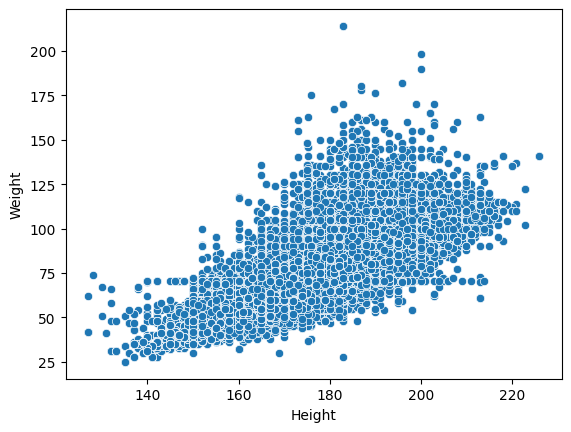

In [128]:
sns.scatterplot(data=data,x='Height',y='Weight')
#Dispersion para peso vs altura

<Axes: xlabel='Height', ylabel='Weight'>

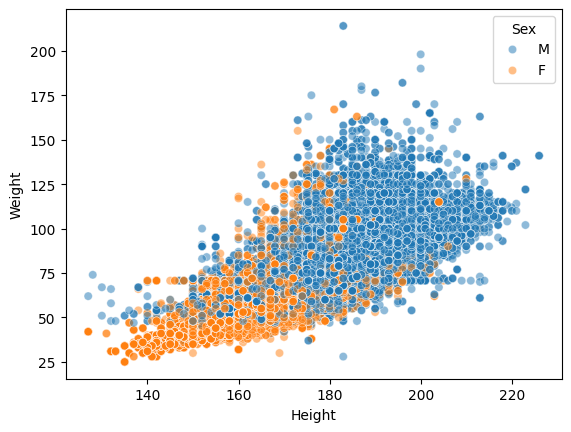

In [ ]:
sns.scatterplot(data=data,x="Height",y="Weight",hue="Sex",alpha=0.5)
##Dispersion para peso vs altura separa por sexo 

In [ ]:
data[["Age","Height","Weight"]].corr()
# saber que tan relacionadas estan las variables

,Age,Height,Weight
Age,1.000000,0.106944,0.161847
Height,0.106944,1.000000,0.786609
Weight,0.161847,0.786609,1.000000


<Axes: >

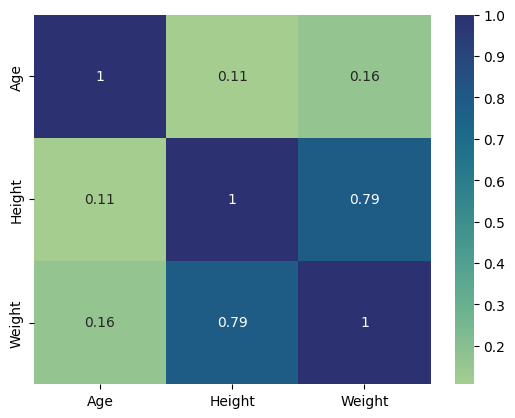

In [136]:
sns.heatmap(data[["Age","Height","Weight"]].corr(),annot=True,cmap='crest')

<Axes: xlabel='Age', ylabel='Count'>

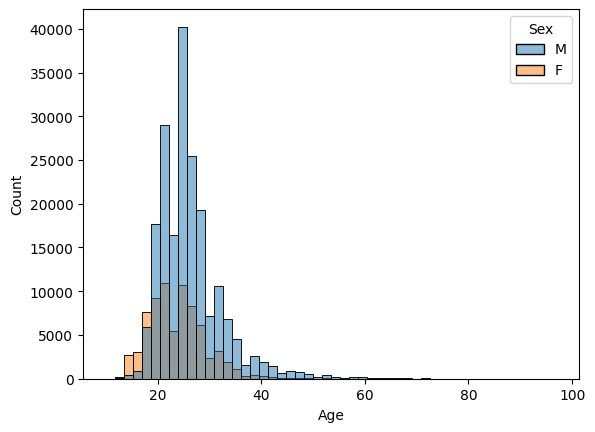

In [137]:
sns.histplot(data=data,x="Age",hue="Sex",bins=50)

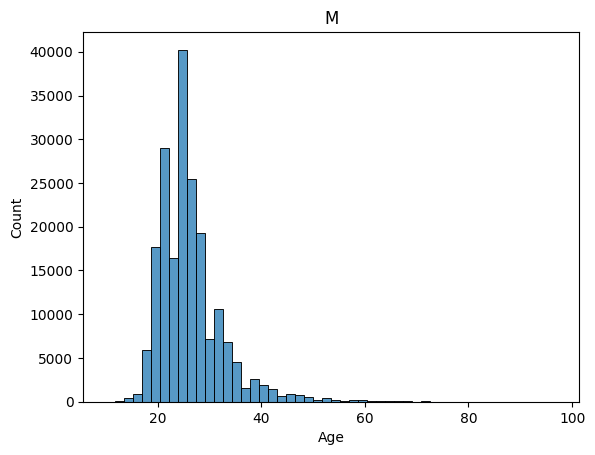

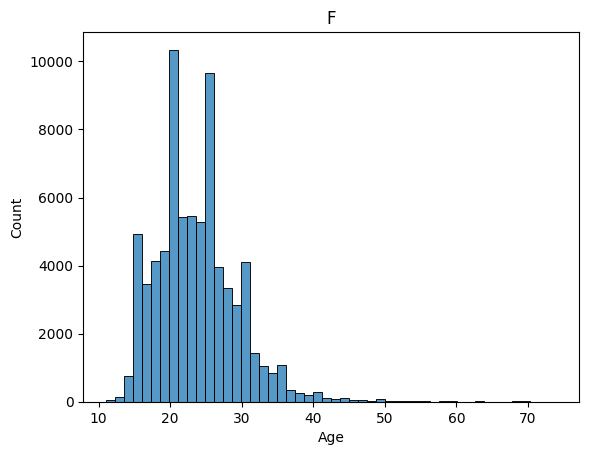

In [138]:
for value in data["Sex"].value_counts().index:
    sns.histplot(data=data[data["Sex"]== value], x="Age",bins=50)
    plt.title(value)
    plt.show()

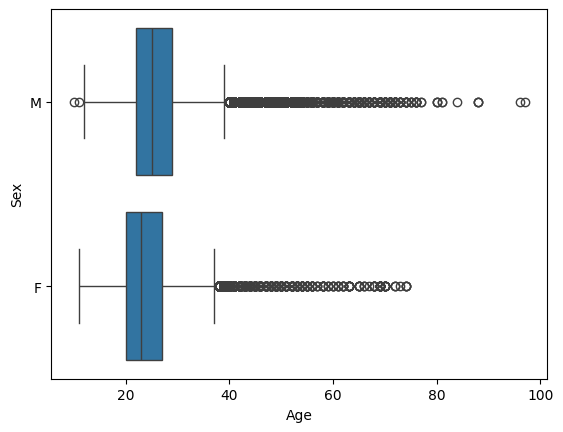

In [145]:
plt.Figure(figsize=(10,6))
sns.boxplot(data=data,x='Age', y='Sex')
plt.show()

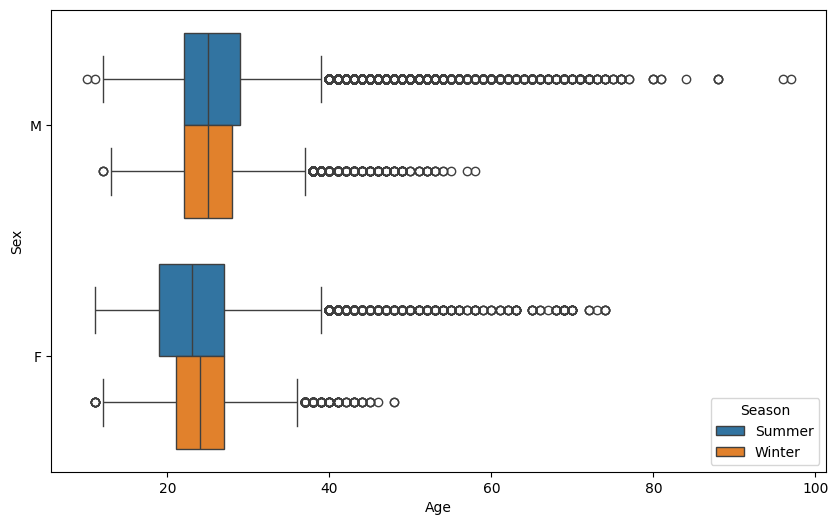

In [146]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x="Age", y="Sex", hue="Season")
plt.show()

C:\Users\Luis Ochoa\AppData\Local\Temp\ipykernel_14404\1484858383.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


<Axes: xlabel='Age', ylabel='Sex'>

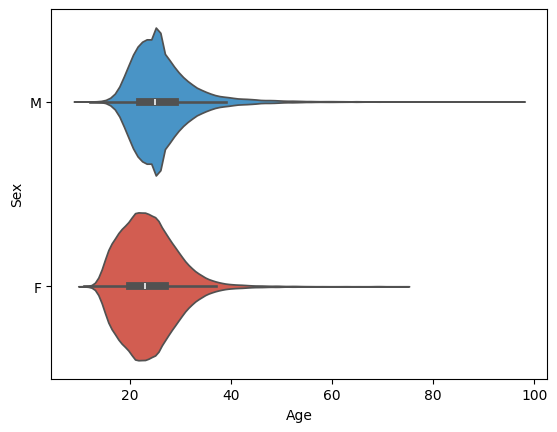

In [150]:
sns.violinplot(
    data=data,
    x="Age",
    y="Sex",
    palette=["#3498db", "#e74c3c"]  # azul y rojo
)


<Axes: xlabel='Year', ylabel='Age'>

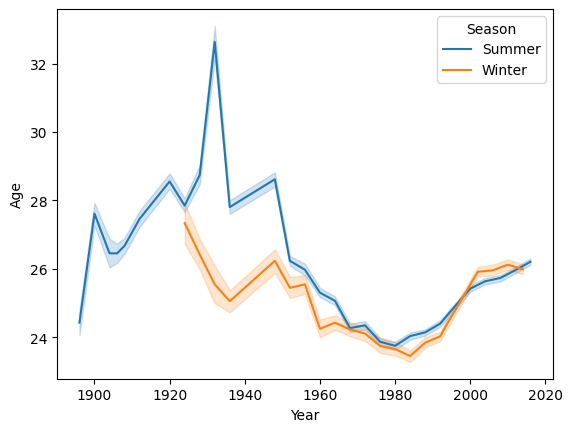

In [151]:
sns.lineplot(data=data,x="Year",y="Age",hue="Season")